# Select fitted distributions

In this example help to make a choice between several distributions fitted to a sample.

Several methods can be used:

- the ranking by the Kolmogorov p-values (for continuous distributions),
- the ranking by the ChiSquared p-values (for discrete distributions),
- the ranking by BIC values.

In [62]:
from __future__ import print_function
import openturns as ot

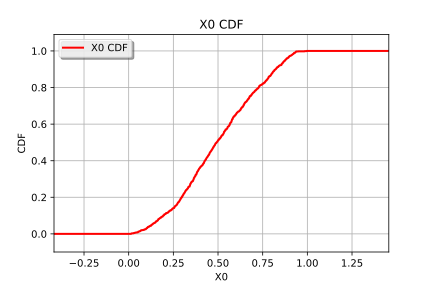

In [131]:
# Create a sample from a continuous distribution
distribution = ot.Beta(2.0, 4.0, 0.0, 1.)
sample = distribution.getSample(1000)
ot.VisualTest.DrawEmpiricalCDF(sample)

**1. Specify the model only**

In [64]:
# Create the list of distribution estimators
factories = [ot.BetaFactory(), ot.TriangularFactory()]

In [65]:
# Rank the continuous models by the Kolmogorov p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelKolmogorov(sample, factories)
test_result

class=TestResult name=Unnamed type=KolmogorovDistribution binaryQualityMeasure=true p-value threshold=0.5 p-value=0.962664 description=[Beta(r = 1.78975, t = 3.63985, a = 0.0115899, b = 0.986749) vs sample Beta]

In [66]:
# Rank the continuous models wrt the BIC criteria (no test result):
ot.FittingTest.BestModelBIC(sample, factories)

class=Beta name=Beta dimension=1 r=1.78975 t=3.63985 a=0.0115899 b=0.986749

**2. Specify the model and its parameters**

In [67]:
# Create a collection of the distributions to be tested
distributions = [ot.Beta(2.0, 4.0, 0.0, 1.0), ot.Triangular(0.0, 0.5, 1.0)]

In [68]:
# Rank the continuous models by the Kolmogorov p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelKolmogorov(sample, distributions)
test_result

class=TestResult name=Unnamed type=KolmogorovDistribution binaryQualityMeasure=true p-value threshold=0.05 p-value=0.552764 description=[Beta(r = 2, t = 4, a = 0, b = 1) vs sample Beta]

In [69]:
# Rank the continuous models wrt the BIC criteria:
ot.FittingTest.BestModelBIC(sample, distributions)

class=Beta name=Beta dimension=1 r=2 t=4 a=0 b=1

**Discrete distributions**

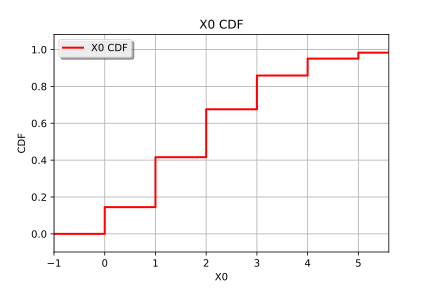

In [130]:
# Create a sample from a discrete distribution
distribution = ot.Poisson(2.0)
sample = distribution.getSample(1000)
ot.VisualTest.DrawEmpiricalCDF(sample)

In [123]:
# Create the list of distribution estimators
distributions = [ot.Poisson(2.0), ot.Geometric(0.1)]

In [124]:
# Rank the discrete models wrt the ChiSquared p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelChiSquared(sample, distributions)
test_result

class=TestResult name=Unnamed type=ChiSquaredPoisson binaryQualityMeasure=true p-value threshold=0.05 p-value=0.839723 description=[]

In [132]:
# Rank the discrete models wrt the BIC criteria:
ot.FittingTest.BestModelBIC(sample, distributions)

class=Poisson name=Poisson dimension=1 lambda=2